# Generate Strategies

Sometimes it can be useful to compare different strategies against each other.

**Caveat: Options are very risky derivatives and, like any other type of financial vehicle, trading options requires due diligence. Transactions shown as examples of trading strategies with options in this notebook are not recommendations.**

In [1]:
from __future__ import print_function

import datetime as dt
import sys

import matplotlib.pyplot as plt
from numpy import zeros

from optionlab import VERSION, Inputs, StrategyEngine, Outputs, plot_pl
from optionlab.strategies import generate_strategies

%matplotlib inline

In [2]:
print("Python version: %s" % sys.version)
print("OptionLab version: %s" % VERSION)

Python version: 3.10.13 (main, Aug 24 2023, 12:59:26) [Clang 15.0.0 (clang-1500.0.40.1)]
OptionLab version: 0.1.7


The underlying asset is Apple stock (ticker: APPL). We consider the stock price on January 18, 2021. Here we can iterate through each of the supported strategies and see which one has the highest PoP and return.

In [2]:
stockprice = 164.04
volatility = 0.272
startdate = dt.date(2021, 11, 22)
targetdate = dt.date(2021, 12, 17)
interestrate = 0.04
minstock = stockprice - round(stockprice * 0.5, 2)
maxstock = stockprice + round(stockprice * 0.5, 2)

def print_outputs(out: Outputs):
    print("Days remaining to the target date: %d" % st.days_to_target)
    print("Strategy cost: %.2f" % out.strategy_cost)
    print("Minimum return: %.2f" % out.minimum_return_in_the_domain)
    print("Maximum return: %.2f" % out.maximum_return_in_the_domain)
    print("Profitable stock price range:")

    for low, high in out.profit_ranges:
        print("      %.2f ---> %.2f" % (low, high))

    print("Probability of Profit (PoP): %.1f%%" % (out.probability_of_profit * 100.0))

## Covered call

Days remaining to the target date: 18
Strategy cost: -15885.00
Minimum return: -7683.00
Maximum return: 1615.00
Profitable stock price range:
      158.86 ---> inf
Probability of Profit (PoP): 67.2%


P/L profile diagram:
--------------------
The vertical green dashed line corresponds to the position of the stock's spot price. The right and left arrow markers indicate the strike prices of calls and puts, respectively, with blue representing long and red representing short positions.


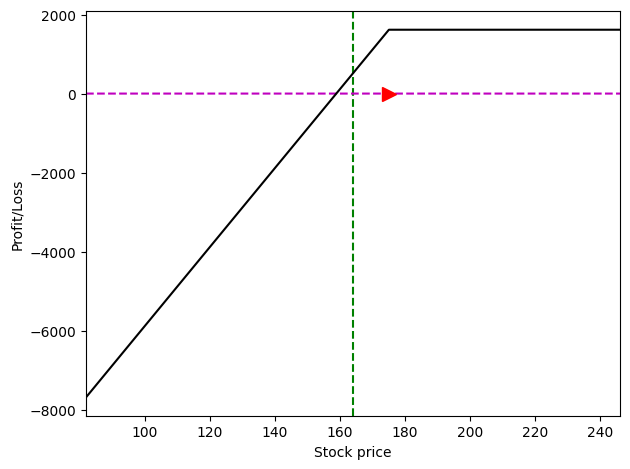

In [10]:
strategy = generate_strategies(
    "covered-call",
    strike=175,
    premium=1.15,
    prev_pos=160,
)
st = StrategyEngine(
    Inputs(
        stock_price=stockprice,
        start_date=startdate,
        target_date=targetdate,
        volatility=volatility,
        interest_rate=interestrate,
        min_stock=minstock,
        max_stock=maxstock,
        strategy=strategy,
    )
)
out = st.run()
print_outputs(out)
print("\n")
plot_pl(st)

## Married put

Days remaining to the target date: 18
Strategy cost: -17115.00
Minimum return: 385.00
Maximum return: 7487.00
Profitable stock price range:
      0.00 ---> inf
Probability of Profit (PoP): 100.0%


P/L profile diagram:
--------------------
The vertical green dashed line corresponds to the position of the stock's spot price. The right and left arrow markers indicate the strike prices of calls and puts, respectively, with blue representing long and red representing short positions.


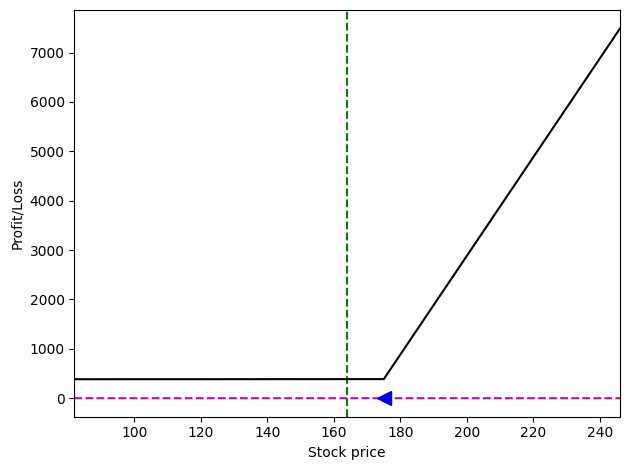

In [15]:
strategy = generate_strategies(
    "married-put",
    strike=175,
    premium=1.15,
    prev_pos=170,
    higher_strike=185,
)
st = StrategyEngine(
    Inputs(
        stock_price=stockprice,
        start_date=startdate,
        target_date=targetdate,
        volatility=volatility,
        interest_rate=interestrate,
        min_stock=minstock,
        max_stock=maxstock,
        strategy=strategy,
    )
)
out = st.run()
print_outputs(out)
print("\n")
plot_pl(st)

## Bull call

Days remaining to the target date: 18
Strategy cost: 0.00
Minimum return: 0.00
Maximum return: 1000.00
Profitable stock price range:
      175.01 ---> inf
Probability of Profit (PoP): 18.7%


P/L profile diagram:
--------------------
The vertical green dashed line corresponds to the position of the stock's spot price. The right and left arrow markers indicate the strike prices of calls and puts, respectively, with blue representing long and red representing short positions.


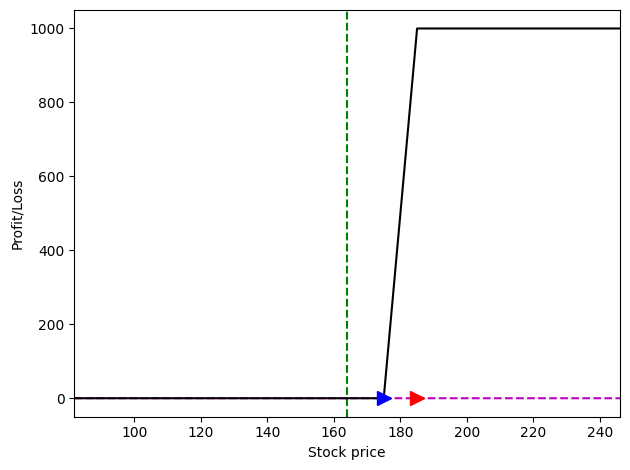

In [19]:
strategy = generate_strategies(
    "bull-call",
    strike=175,
    premium=1.15,
    prev_pos=170,
    higher_strike=185,
)
st = StrategyEngine(
    Inputs(
        stock_price=stockprice,
        start_date=startdate,
        target_date=targetdate,
        volatility=volatility,
        interest_rate=interestrate,
        min_stock=minstock,
        max_stock=maxstock,
        strategy=strategy,
    )
)
out = st.run()
print_outputs(out)
print("\n")
plot_pl(st)

## Bear put

Days remaining to the target date: 18
Strategy cost: 0.00
Minimum return: 0.00
Maximum return: 1500.00
Profitable stock price range:
      0.00 ---> 174.99
Probability of Profit (PoP): 81.2%


P/L profile diagram:
--------------------
The vertical green dashed line corresponds to the position of the stock's spot price. The right and left arrow markers indicate the strike prices of calls and puts, respectively, with blue representing long and red representing short positions.


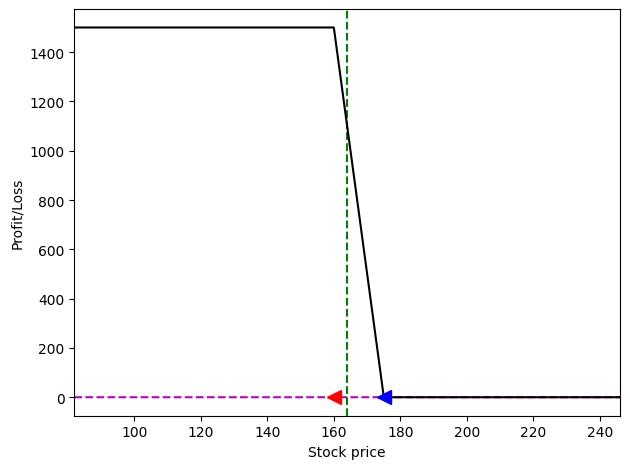

In [4]:
strategy = generate_strategies(
    "bear-put",
    strike=175,
    premium=1.15,
    prev_pos=170,
    lower_strike=160,
)
st = StrategyEngine(
    Inputs(
        stock_price=stockprice,
        start_date=startdate,
        target_date=targetdate,
        volatility=volatility,
        interest_rate=interestrate,
        min_stock=minstock,
        max_stock=maxstock,
        strategy=strategy,
    )
)
out = st.run()
print_outputs(out)
print("\n")
plot_pl(st)

## Protective collar

Days remaining to the target date: 18
Strategy cost: -17000.00
Minimum return: 500.00
Maximum return: 1500.00
Profitable stock price range:
      0.00 ---> inf
Probability of Profit (PoP): 100.0%


P/L profile diagram:
--------------------
The vertical green dashed line corresponds to the position of the stock's spot price. The right and left arrow markers indicate the strike prices of calls and puts, respectively, with blue representing long and red representing short positions.


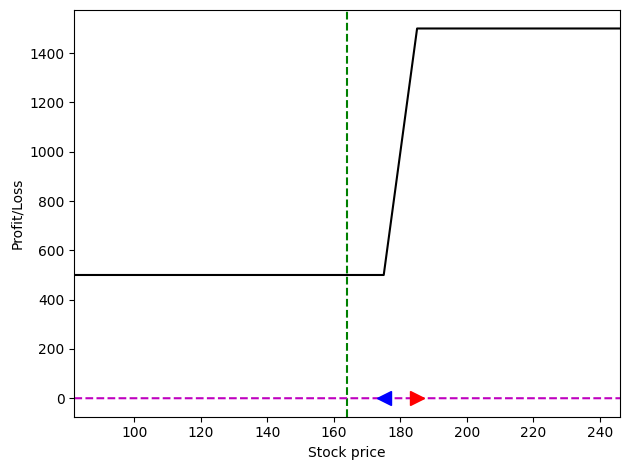

In [17]:
strategy = generate_strategies(
    "protective-collar",
    strike=175,
    premium=1.15,
    prev_pos=170,
    higher_strike=185,
)
st = StrategyEngine(
    Inputs(
        stock_price=stockprice,
        start_date=startdate,
        target_date=targetdate,
        volatility=volatility,
        interest_rate=interestrate,
        min_stock=minstock,
        max_stock=maxstock,
        strategy=strategy,
    )
)
out = st.run()
print_outputs(out)
print("\n")
plot_pl(st)

Profit/loss profiles for each leg and the overall strategy are obtained by calling the `get_pl` method and plotted at the option's maturity.

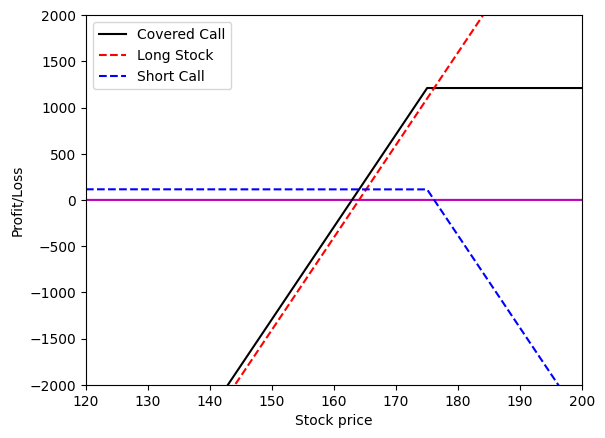

In [8]:
s, pl_total = st.get_pl()
leg = []

for i in range(len(strategy)):
    leg.append(st.get_pl(i)[1])

zeroline = zeros(s.shape[0])
plt.xlabel("Stock price")
plt.ylabel("Profit/Loss")
plt.xlim(120, 200)
plt.ylim(-2000, 2000)
plt.plot(s, zeroline, "m-")
plt.plot(s, pl_total, "k-", label="Covered Call")
plt.plot(s, leg[0], "r--", label="Long Stock")
plt.plot(s, leg[1], "b--", label="Short Call")
plt.legend(loc="upper left")

Below one can see some useful results of the calculations made for the strategy, including its PoP.

In [9]:
print("Days remaining to the target date: %d" % st.days2target)
print("Strategy cost: %.2f" % out.strategy_cost)
print("Maximum loss: %.2f" % abs(out.minimum_return_in_the_domain))
print("Maximum profit: %.2f" % out.maximum_return_in_the_domain)
print("Profitable stock price range:")

for low, high in out.profit_ranges:
    print("      %.2f ---> %.2f" % (low, high))

print("Probability of Profit (PoP): %.1f%%" % (out.probability_of_profit * 100.0))

Days remaining to the target date: 18
Strategy cost: -16289.00
Maximum loss: 8087.00
Maximum profit: 1211.00
Profitable stock price range:
      162.90 ---> inf
Probability of Profit (PoP): 52.4%
